# Método de Máxima Inclinación (Steepest Descent/Ascent)
## Método iterativo que avanza en dirección de la pendiente

In [1]:
# Celda 1: Importaciones
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Celda 2: Función objetivo
f = lambda x: x**4 - 4*x**3 + 3*x**2 + 5
# Función ejemplo: x⁴ - 4x³ + 3x² + 5. Buscamos mínimo local en [0, 4].

In [3]:
# Celda 3: Implementación del método de máxima inclinación
def metodo_maxima_inclinacion(f, a, b, tol=1e-6, max_iter=100, buscar_maximo=False):
    h = 1e-8
    df = lambda x: (f(x+h) - f(x-h)) / (2*h)
    x_n = (a + b) / 2  # Punto inicial
    alpha = 0.01  # Tamaño de paso
    iteraciones, x_vals, fx_vals, errores = [], [], [], []
    
    for i in range(max_iter):
        x_prev = x_n
        grad = df(x_n)
        if buscar_maximo:
            x_n = x_n + alpha * grad  # Ascenso
        else:
            x_n = x_n - alpha * grad  # Descenso
        x_n = np.clip(x_n, a, b)  # Mantener en intervalo
        error = abs(x_n - x_prev)
        iteraciones.append(i + 1)
        x_vals.append(x_n)
        fx_vals.append(f(x_n))
        errores.append(error)
        if error < tol: break
    
    tabla = pd.DataFrame({'Iteración': iteraciones, 'x_n': x_vals, 'f(x_n)': fx_vals, 'Error_abs': errores})
    return x_n, tabla, x_vals

In [4]:
# Celda 4: Ejecución con caso por defecto
x_opt, tabla, historial = metodo_maxima_inclinacion(f, 0, 4, buscar_maximo=False)

print("Óptimo encontrado:", x_opt)
print(tabla.round(6))

Óptimo encontrado: 2.3660209122458014
    Iteración       x_n    f(x_n)  Error_abs
0           1  2.040000  0.845059   0.040000
1           2  2.077405  0.710244   0.037405
2           3  2.112024  0.595334   0.034618
3           4  2.143740  0.499330   0.031716
4           5  2.172517  0.420641   0.028777
..        ...       ...       ...        ...
61         62  2.366016  0.151924   0.000002
62         63  2.366018  0.151924   0.000002
63         64  2.366019  0.151924   0.000001
64         65  2.366020  0.151924   0.000001
65         66  2.366021  0.151924   0.000001

[66 rows x 4 columns]


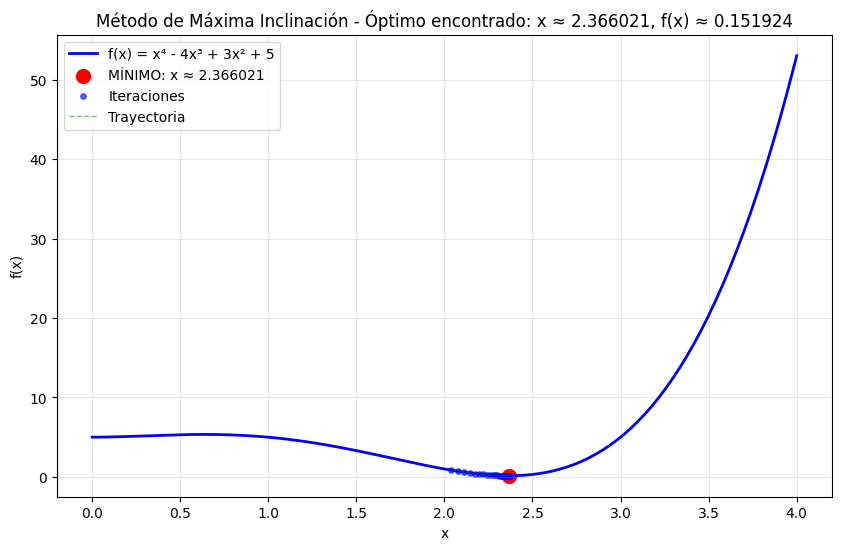

In [5]:
# Celda 5: Gráfica de convergencia
x = np.linspace(0, 4, 200)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x⁴ - 4x³ + 3x² + 5')
plt.scatter(x_opt, f(x_opt), color='red', s=100, label=f'MÍNIMO: x ≈ {x_opt:.6f}')
plt.scatter(historial, [f(xi) for xi in historial], color='blue', s=15, alpha=0.6, label='Iteraciones')
# Mostrar trayectoria
if len(historial) > 1:
    plt.plot(historial, [f(xi) for xi in historial], 'g--', alpha=0.5, linewidth=1, label='Trayectoria')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Método de Máxima Inclinación - Óptimo encontrado: x ≈ {x_opt:.6f}, f(x) ≈ {f(x_opt):.6f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

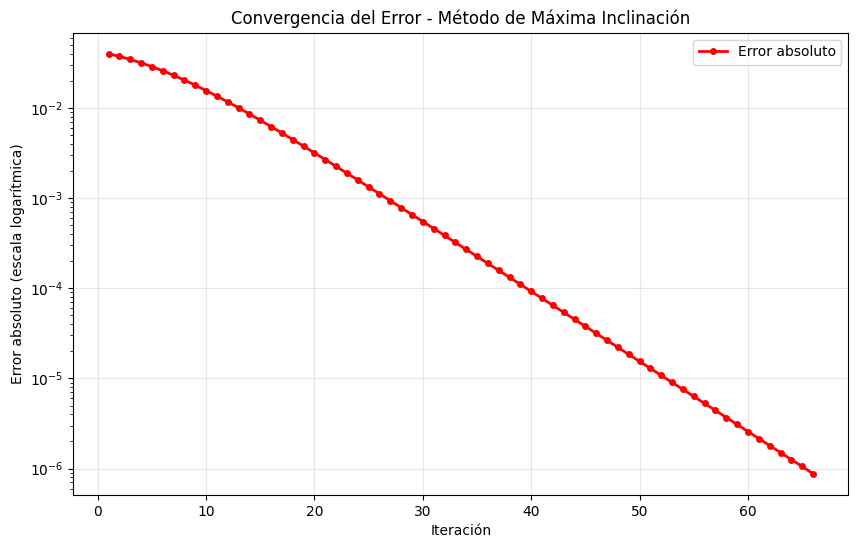

Error final: 8.76e-07
Tasa de convergencia promedio: -0.1651


In [6]:
# Celda 6: Gráfica de error de convergencia
plt.figure(figsize=(10, 6))
plt.semilogy(tabla['Iteración'], tabla['Error_abs'], 'r-o', linewidth=2, markersize=4, label='Error absoluto')
plt.xlabel('Iteración')
plt.ylabel('Error absoluto (escala logarítmica)')
plt.title('Convergencia del Error - Método de Máxima Inclinación')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Error final: {tabla['Error_abs'].iloc[-1]:.2e}")
print(f"Tasa de convergencia promedio: {np.mean(np.diff(np.log(tabla['Error_abs']))):.4f}")

In [7]:
# Celda 7: Interfaz interactiva simple
print("=== Método de Máxima Inclinación Interactivo ===")

# Función del usuario
f_str = input("Ingrese f(x) (dejar vacío para usar por defecto): ").strip()
if f_str:
    try:
        f_user = lambda x: eval(f_str)
        f_user(2)  # Validar
        f = f_user
        print(f"Usando función: {f_str}")
    except:
        print("Error: función no válida. Usando caso por defecto.")

# Intervalo del usuario
interval_str = input("Ingrese [a,b] (ej. 0,4) o dejar vacío: ").strip()
a, b = 0, 4
if interval_str:
    try:
        vals = [float(x.strip()) for x in interval_str.split(',')]
        if len(vals) == 2:
            a, b = vals
    except:
        print("Intervalo inválido, usando [0,4]")

# Tipo de búsqueda
tipo_str = input("¿Buscar máximo? (s/n, dejar vacío para mínimo): ").strip().lower()
buscar_maximo = tipo_str in ['s', 'si', 'sí', 'y', 'yes']

# Ejecutar método
try:
    x_opt_user, tabla_user, _ = metodo_maxima_inclinacion(f, a, b, buscar_maximo=buscar_maximo)
    tipo = "máximo" if buscar_maximo else "mínimo"
    print(f"\n{tipo.capitalize()} encontrado: x = {x_opt_user:.6f}")
    print(tabla_user.tail().round(6))
except Exception as e:
    print(f"Error: {e}")

=== Método de Máxima Inclinación Interactivo ===

Mínimo encontrado: x = 2.366021
    Iteración       x_n    f(x_n)  Error_abs
61         62  2.366016  0.151924   0.000002
62         63  2.366018  0.151924   0.000002
63         64  2.366019  0.151924   0.000001
64         65  2.366020  0.151924   0.000001
65         66  2.366021  0.151924   0.000001
